In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta       
import seaborn as sns
from sklearn.model_selection import train_test_split


Get an idea of what the data we're working with looks like

In [361]:
df = pd.read_csv('ENB2012_data.csv')
df

#note to self :

#input parameters
# X1 Relative Compactness
# X2 Surface Area
# X3 Wall Area
# X4 Roof Area
# X5 Overall Height
# X6 Orientation
# X7 Glazing Area
# X8 Glazing Area Distribution

# outputs
# y1 Heating Load
# y2 Cooling Load




,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [362]:
def check_clean_data(df):
    print(df.isnull().sum()) #check for null values
    print("\n(Rows, Columns)", df.shape) #check for missing values

    print("\nCheck for empty values")
    print(df[df.eq("?").any(1)]) #check for missing values
check_clean_data(df)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

(Rows, Columns) (768, 10)

Check for empty values
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []


/var/folders/b5/ct06m_093mj2jmq58ft3jbq00000gn/T/ipykernel_81216/1635922065.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print(df[df.eq("?").any(1)]) #check for missing values


In [363]:
def standardize_data(df):
    feature_cols = [col for col in df.columns if col not in ['Y1', 'Y2']]
    for col in feature_cols:
        df[col] = (df[col] - df[col].mean())/df[col].std()
    return df
df = standardize_data(df)
df


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.759300,-1.813393,15.55,21.33
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.759300,-1.813393,15.55,21.33
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.759300,-1.813393,15.55,21.33
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.759300,-1.813393,15.55,21.33
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.759300,-1.813393,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,-1.173848,1.274794,0.561586,0.971879,-0.999349,1.340767,1.243239,1.410417,17.88,21.40
764,-1.362924,1.552931,1.123171,0.971879,-0.999349,-1.340767,1.243239,1.410417,16.54,16.88
765,-1.362924,1.552931,1.123171,0.971879,-0.999349,-0.446922,1.243239,1.410417,16.44,17.11
766,-1.362924,1.552931,1.123171,0.971879,-0.999349,0.446922,1.243239,1.410417,16.48,16.61


In [364]:
def df_stats(df):
    print(df.describe().round(6))
df_stats(df)

               X1          X2          X3          X4          X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.000000   -0.000000    0.000000    0.000000    0.000000    0.000000   
std      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
min     -1.362924   -1.784712   -1.684757   -1.469119   -0.999349   -1.340767   
25%     -0.772061   -0.741698   -0.561586   -0.791064   -0.999349   -0.670384   
50%     -0.133929    0.023178    0.000000    0.158213    0.000000    0.000000   
75%      0.622376    0.788055    0.561586    0.971879    0.999349    0.670384   
max      2.040447    1.552931    2.246342    0.971879    0.999349    1.340767   

               X7          X8          Y1          Y2  
count  768.000000  768.000000  768.000000  768.000000  
mean     0.000000   -0.000000   22.307201   24.587760  
std      1.000000    1.000000   10.090196    9.513306  
min     -1.759300   -1.813393    6.010000   10

In [365]:
# sns.pairplot(df)

Finding Correlation between features

In [366]:
corr_df = df.corr().round(6)
corr_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991901,-0.203782,-0.868823,0.827747,-0.000000,-0.000000,-0.000000,0.622272,0.634339
X2,-0.991901,1.000000,0.195502,0.880720,-0.858148,0.000000,-0.000000,-0.000000,-0.658120,-0.672999
X3,-0.203782,0.195502,1.000000,-0.292316,0.280976,0.000000,0.000000,0.000000,0.455671,0.427117
X4,-0.868823,0.880720,-0.292316,1.000000,-0.972512,0.000000,0.000000,-0.000000,-0.861828,-0.862547
X5,0.827747,-0.858148,0.280976,-0.972512,1.000000,-0.000000,-0.000000,-0.000000,0.889431,0.895785
X6,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,0.000000,-0.002587,0.014290
X7,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.212964,0.269841,0.207505
X8,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.212964,1.000000,0.087368,0.050525
Y1,0.622272,-0.658120,0.455671,-0.861828,0.889431,-0.002587,0.269841,0.087368,1.000000,0.975862
Y2,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


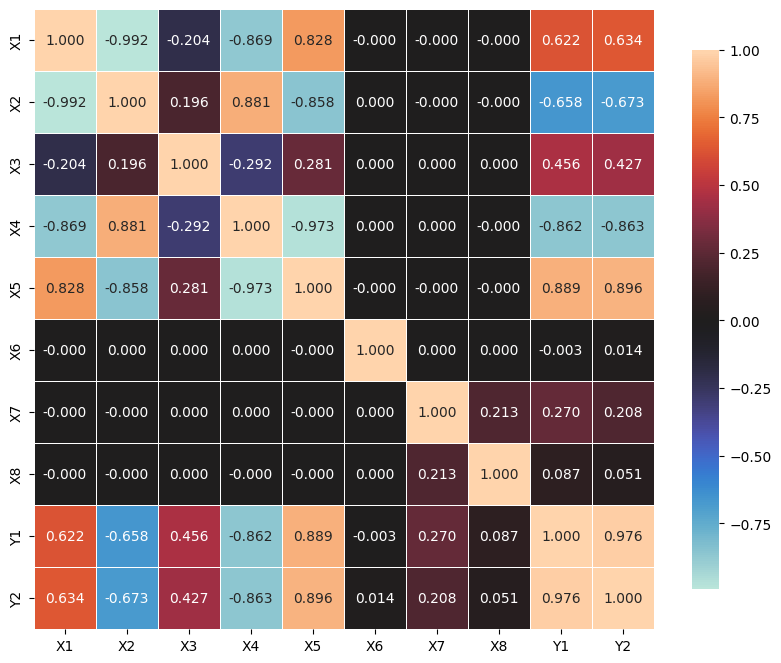

In [367]:
#code taken from https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4#:~:text=Positive%20Correlation%3A%20means%20that%20if,they%20have%20a%20linear%20relationship.

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.3f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()

correlation_heatmap(df)

Convert to Numpy for easier computation

In [368]:
features = df.copy()
features = features.drop(columns=["Y1", "Y2"])


In [369]:
labels = df.copy()
labels = labels.drop(columns=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"])

Convert to numpy

In [370]:
features = features.to_numpy()
labels = labels.to_numpy()


In [371]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(N),x])    #add bias by adding a constant feature of value 1
        # self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        self.w = np.linalg.inv(x.T @ x)@x.T@y  
        return self, self.w
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(N),x])
        yh = x@self.w                             #predict the y values
        return yh


Normal Linear Regression with linear feature function

In [372]:
model = LinearRegression()
yh_linear, w = model.fit(features, labels)
yh_linear = yh_linear.predict(features)
print("yh",yh_linear)
print("y", labels)
print("shape x", features.shape)
# plt.plot(features, labels, '.')
# plt.plot(features, yh_linear, 'g-', alpha=.5)
# plt.xlabel('x')
# plt.ylabel(r'$y=xw_1 + w_0$')
# plt.show()

yh [[25.13617594 28.29913657]
 [25.11284781 28.42064698]
 [25.08951969 28.5421574 ]
 ...
 [16.71327821 17.4413114 ]
 [16.68995009 17.56282182]
 [16.66662196 17.68433223]]
y [[15.55 21.33]
 [15.55 21.33]
 [15.55 21.33]
 ...
 [16.44 17.11]
 [16.48 16.61]
 [16.64 16.03]]
shape x (768, 8)


Non Linear Feature Function using Guassian function

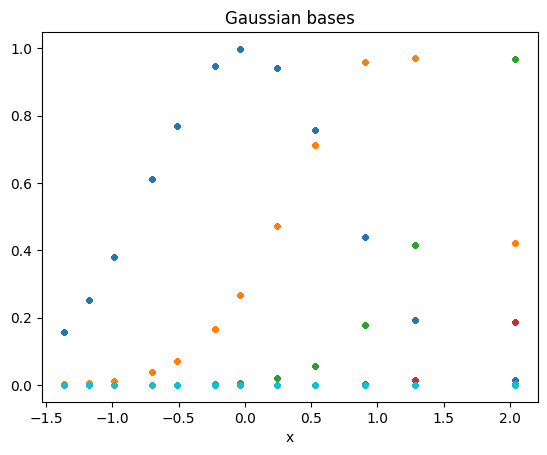

In [373]:
x = features[:,0]
D=10
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function
mu = np.linspace(0,10,D)                                          #different mean values for the non-linear features
phi = gaussian(x[:,None], mu[None,:],1)                           #gives a new set of features of the existing data
for d in range(D):
    plt.plot(x, phi[:,d], '.')
    # plt.plot(x, phi[:,d], '.')
    
plt.xlabel('x')
plt.title('Gaussian bases')
plt.show()


In [374]:
yh_guass, x = model.fit(phi,labels)
yh_guass = yh_guass.predict(phi)
print("yh",yh_guass)
print("y", labels)

yh [[32.46932896 34.31414123]
 [32.46932896 34.31414123]
 [32.46932896 34.31414123]
 ...
 [18.77712561 20.78568376]
 [18.77712561 20.78568376]
 [18.77712561 20.78568376]]
y [[15.55 21.33]
 [15.55 21.33]
 [15.55 21.33]
 ...
 [16.44 17.11]
 [16.48 16.61]
 [16.64 16.03]]


Non linear with sigmoid

In [375]:
# D=10
# sigmoid = lambda x,mu, s: 1/(1 + np.exp(-(x - mu)/s))
# mu = np.linspace(0,10,D)
# phi = sigmoid(x[:,None], mu[None,:], .5)
# for d in range(D):
#     plt.plot(x, phi[:,d], '.')
# plt.xlabel('x')
# plt.title('Sigmoid bases')
# plt.show()

In [376]:
# yh_sig = model.fit(phi,labels).predict(phi)
# print("yh",yh_sig)
# print("y", labels)

How Well Did each model implementation do?

In [377]:
#mean squared error
def mse(y, yh):
    return np.mean((y-yh)**2)
# print("MSE for linear regression", mse(labels, yh_linear))
# print("MSE for gaussian regression", mse(labels, yh_guass))
# print("MSE for sigmoid regression", mse(labels, yh_sig))

Experiments:
We first start by defining a function to split the data into training and test sets

In [378]:
def mean_squared_error(matrix1, matrix2):
    # Calculate the difference between the matrices
    difference = matrix1 - matrix2
    # Calculate the squared difference
    squared_difference = difference**2
    # Calculate the mean of the squared difference
    mean_squared_difference = np.mean(squared_difference)
    # Return the mean squared error
    return mean_squared_difference

def mean_absolute_error(matrix1, matrix2):
    # Calculate the absolute difference between the matrices
    difference = np.abs(matrix1 - matrix2)
    # Calculate the mean of the absolute difference
    mean_absolute_difference = np.mean(difference)
    # Return the mean absolute error
    return mean_absolute_difference

def r_squared(matrix1, matrix2):
    # Calculate the mean of the first matrix
    mean1 = np.mean(matrix1)
    # Calculate the difference between the matrices and the mean of the first matrix
    difference = matrix1 - matrix2
    mean_difference = matrix1 - mean1
    # Calculate the sum of squared differences
    squared_difference = difference**2
    mean_squared_difference = mean_difference**2
    # Calculate the R-squared
    r_squared = 1 - (np.sum(squared_difference) / np.sum(mean_squared_difference))
    # Return the R-squared
    return r_squared


# print("MSE", mean_squared_error(y_test, yh))
# print("MAE", mean_absolute_error(y_test, yh))
# print("R^2", r_squared(y_test, yh))

In [379]:
import random
class DataSplitting:

    def  split_dataset(self,x, y, test_ratio):
        data_len = len(x)
        test_len = int(data_len * test_ratio)
        indices = random.sample(range(data_len), test_len)
        data_test = [x[i] for i in indices]
        target_test = [y[i] for i in indices]
        data_train = [x[i] for i in range(data_len) if i not in indices]
        target_train = [y[i] for i in range(data_len) if i not in indices]
        return data_train, data_test, target_train, target_test

print(features)

[[ 2.040447   -1.78471183 -0.56158551 ... -1.34076704 -1.75930048
  -1.81339339]
 [ 2.040447   -1.78471183 -0.56158551 ... -0.44692235 -1.75930048
  -1.81339339]
 [ 2.040447   -1.78471183 -0.56158551 ...  0.44692235 -1.75930048
  -1.81339339]
 ...
 [-1.36292406  1.55293107  1.12317103 ... -0.44692235  1.243239
   1.41041708]
 [-1.36292406  1.55293107  1.12317103 ...  0.44692235  1.243239
   1.41041708]
 [-1.36292406  1.55293107  1.12317103 ...  1.34076704  1.243239
   1.41041708]]


1- Report the performance of linear regression and fully batched logistic regression. For both datasets use a 80/20
train/test split and report the performance on both training set and test set.

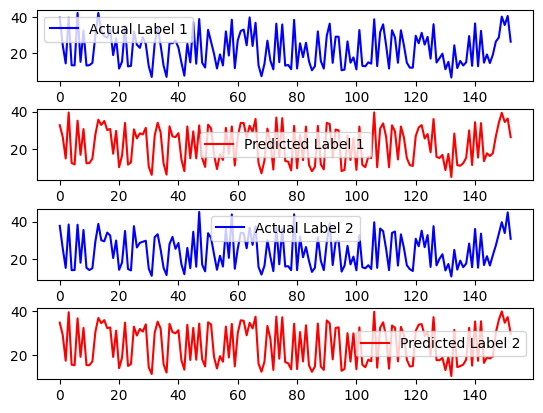

MSE for linear regression, testing set:
 8.954478409705631
MSE for linear regression, training set:
 9.658927089933721
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 22.34816686  24.65313829]
 [ -4.90703565  -5.68336305]
 [ 30.23671565  30.72395423]
 [-15.41231725 -16.43705104]
 [-36.90003251 -37.62187338]
 [  7.65952644   7.89755114]
 [  0.05277723   0.24702218]
 [  2.59960604   1.88271292]
 [  0.41409719   0.13078952]]
Import

In [380]:
experiment1 = DataSplitting()
feat_train, feat_test, label_train, label_test = experiment1.split_dataset(features,labels,0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot
plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mse(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mse(label_train, exp1_train_expected))

print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()


Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training
data affects the performance for both models. Plot two curves as a function of training size, one for performance
in train and one for test.

Linear Regression:

8.72916785360366 22.53324109715153 734.4416355272854 10.085386424899406 10.461618029306987 21.235389753182115 10.302984184506386 

10.727435723057106 27.243332088511927 560.7235949011215 9.736279480310273 9.875737114397623 23.27518635846033 8.137259187144188


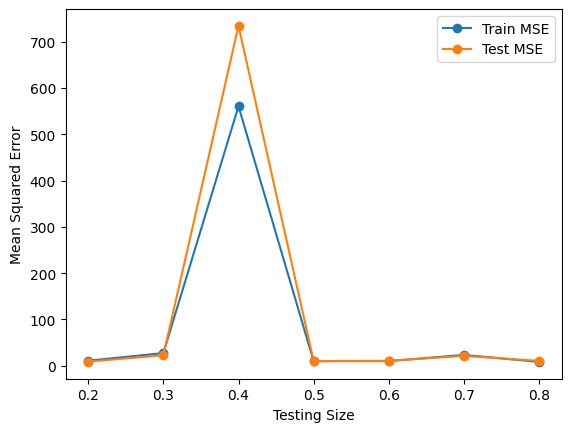

In [381]:
def linearRegressionDiffSize(ratio):
    experiment3 = DataSplitting()
    feat_train, feat_test, label_train, label_test = experiment3.split_dataset(features,labels,ratio)
    experiment3_lr = LinearRegression()
    feat_train  = np.array(feat_train)
    feat_test  = np.array(feat_test)
    label_train  = np.array(label_train)
    label_test  = np.array(label_test)
    exp3_training, weights = experiment3_lr.fit(feat_train, label_train)
    exp3_testing = exp3_training.predict(feat_test)
    exp3_testingTrainSet = exp3_training.predict(feat_train)
    return exp3_testing, mse(label_test, exp3_testing), mse(label_train, exp3_testingTrainSet)

subset_20, mse_subset_20, mse_train_subset_20 = linearRegressionDiffSize(0.2)
subset_30, mse_subset_30, mse_train_subset_30 = linearRegressionDiffSize(0.3)
subset_40, mse_subset_40, mse_train_subset_40 = linearRegressionDiffSize(0.4)
subset_50, mse_subset_50, mse_train_subset_50 = linearRegressionDiffSize(0.5)
subset_60, mse_subset_60, mse_train_subset_60 = linearRegressionDiffSize(0.6)
subset_70, mse_subset_70, mse_train_subset_70 = linearRegressionDiffSize(0.7)
subset_80, mse_subset_80, mse_train_subset_80 = linearRegressionDiffSize(0.8)
print(mse_subset_20,mse_subset_30,mse_subset_40,mse_subset_50,mse_subset_60,mse_subset_70,mse_subset_80,"\n")
print(mse_train_subset_20,mse_train_subset_30,mse_train_subset_40,mse_train_subset_50,mse_train_subset_60,mse_train_subset_70,mse_train_subset_80)
# Define the training size and MSE values
test_sizes = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
test_mse = [mse_subset_20,mse_subset_30,mse_subset_40,mse_subset_50,mse_subset_60,mse_subset_70,mse_subset_80]
train_mse = [mse_train_subset_20,mse_train_subset_30,mse_train_subset_40,mse_train_subset_50,mse_train_subset_60,mse_train_subset_70,mse_train_subset_80]
plt.plot(test_sizes, train_mse, 'o-', label='Train MSE')
plt.plot(test_sizes, test_mse, 'o-', label='Test MSE')
plt.xlabel('Testing Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Mini-batch stochastic gradient descent and linear regression with sgd

In [382]:
class LinearRegression_sgd:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([np.ones(N),x])
        N,D = x.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w
            N, D = x.shape
            ynew = yh - y
            grad = .5*np.dot(np.transpose(x), ynew)/N 
            return grad
        w0 = np.zeros((D,2))                     # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([np.ones(N),x])
        yh = x@self.w
        return yh

In [383]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False, batch_size = 1):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.batch_size = batch_size
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        total_samples = x.shape[0]
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            for i in range(0, total_samples, self.batch_size):
                mini_batch_x  = x[i: i+self.batch_size]
                mini_batch_y  = y[i: i+self.batch_size]
                grad = gradient_fn(mini_batch_x, mini_batch_y, w)               # compute the gradient with present weight
                self.w_history.append(w)
                w = w - self.learning_rate * grad         # weight update step
                if self.record_history:
                    self.w_history.append(w)
                t += 1
        return w

In [384]:
# optimizer = GradientDescent(learning_rate=.1, max_iters=100, record_history=True, batch_size=32)
# # X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.5)
# # X_train  = np.array(X_train)
# # X_test  = np.array(X_test)
# labels  = np.array(labels)
# features  = np.array(features)
# m = LinearRegression_sgd()
# train = m.fit(features,labels,optimizer)
# yh_test =  train.predict(features)
# print(mean_squared_error(labels,yh_test))


In [385]:
def growing_mini_batches(size):
    optimizer = GradientDescent(learning_rate=.1, max_iters=100, record_history=True, batch_size=size)
    # labels  = np.array(labels)
    # features  = np.array(features)
    m = LinearRegression_sgd()
    train = m.fit(features,labels,optimizer)
    yh =  train.predict(features)
    return mean_squared_error(labels, yh)

print(growing_mini_batches(8))
print(growing_mini_batches(16))
print(growing_mini_batches(32))
print(growing_mini_batches(64))
print(growing_mini_batches(128))





24.2788068516675
12.304214981935319
11.97582066813066
11.74393379214618
11.655402937789512
